# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1]:
#import librarires
# Read the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import numpy as np 
import os
import pandas as pd
os.chdir('D:\\Insofe\\Python Lab\\Data_Forall')

In [3]:
# Read the Input files
train = pd.read_csv("TrainData.csv")
test = pd.read_csv("TestData.csv")


In [4]:
train.isnull().sum()

VehicleID                        0
DataCollectedDate                0
NameOfTheVehicle                 0
SellerType                       0
OfferType                        0
Price                            0
VehicleType                   1844
YearOfVehicleRegistration        0
GearBoxType                   1719
PowerOfTheEngine                 0
ModelOfTheVehicle                0
DistranceTravelled               0
MonthOfVehicleRegistration       0
TypeOfTheFuelUsed             2085
BrandOfTheVehicle                0
IsDamageRepaired              6849
DateOfAdCreation                 0
NumberOfPictures                 0
ZipCode                          0
DateOfAdLastSeen                 0
dtype: int64

In [5]:
train1 = train.copy()
test1 = test.copy()

In [6]:
# Imputing the Missing values with Most frquenet Items
#train = train.fillna(train1.mode().iloc[0])

In [7]:
train.isnull().sum()

VehicleID                        0
DataCollectedDate                0
NameOfTheVehicle                 0
SellerType                       0
OfferType                        0
Price                            0
VehicleType                   1844
YearOfVehicleRegistration        0
GearBoxType                   1719
PowerOfTheEngine                 0
ModelOfTheVehicle                0
DistranceTravelled               0
MonthOfVehicleRegistration       0
TypeOfTheFuelUsed             2085
BrandOfTheVehicle                0
IsDamageRepaired              6849
DateOfAdCreation                 0
NumberOfPictures                 0
ZipCode                          0
DateOfAdLastSeen                 0
dtype: int64

In [8]:
train1.isnull().sum()

VehicleID                        0
DataCollectedDate                0
NameOfTheVehicle                 0
SellerType                       0
OfferType                        0
Price                            0
VehicleType                   1844
YearOfVehicleRegistration        0
GearBoxType                   1719
PowerOfTheEngine                 0
ModelOfTheVehicle                0
DistranceTravelled               0
MonthOfVehicleRegistration       0
TypeOfTheFuelUsed             2085
BrandOfTheVehicle                0
IsDamageRepaired              6849
DateOfAdCreation                 0
NumberOfPictures                 0
ZipCode                          0
DateOfAdLastSeen                 0
dtype: int64

In [9]:
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

In [10]:
# Check the columns in dataframe
train.columns

Index(['VehicleID', 'DataCollectedDate', 'NameOfTheVehicle', 'SellerType',
       'OfferType', 'Price', 'VehicleType', 'YearOfVehicleRegistration',
       'GearBoxType', 'PowerOfTheEngine', 'ModelOfTheVehicle',
       'DistranceTravelled', 'MonthOfVehicleRegistration', 'TypeOfTheFuelUsed',
       'BrandOfTheVehicle', 'IsDamageRepaired', 'DateOfAdCreation',
       'NumberOfPictures', 'ZipCode', 'DateOfAdLastSeen'],
      dtype='object')

In [11]:
# Distribution of Targer variable
train['Price'].describe()

count    58857.000000
mean      7638.980971
std       6710.787043
min       1001.000000
25%       2850.000000
50%       5400.000000
75%       9999.000000
max      39800.000000
Name: Price, dtype: float64

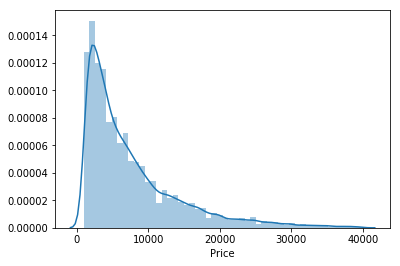

In [12]:
# histogram
sns.distplot(train['Price'])

In [13]:
# Obsserved that it is right skewed, we should apply the log transformation
# Skewness and Curtosis
print("Skewness: %f" % train['Price'].skew())
print("Kurtosis: %f" % train['Price'].kurt())

Skewness: 1.741881
Kurtosis: 3.239900


In [14]:
# Extract Categorical Variables and Numeric variables
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,VehicleType,GearBoxType,ModelOfTheVehicle,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,DateOfAdLastSeen
count,58857,58857,58857,58857,57013,57138,58857,56772,58857,52008,58857,58857
unique,12358,40839,1,1,8,2,235,7,38,2,77,10739
top,30-03-2016 21:55,Volkswagen_Polo_1.2,private,offer,limousine,manual,golf,petrol,volkswagen,No,03-04-2016 00:00,06-04-2016 06:45
freq,17,110,58857,58857,15670,42481,4127,31040,11829,48689,2457,147


In [15]:
# Extract Numerical Variables
Numerical = train.select_dtypes(include=[np.number])
Numerical.describe()

,VehicleID,Price,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,NumberOfPictures,ZipCode
count,58857.000000,58857.000000,58857.000000,58857.000000,58857.000000,58857.000000,58857.0,58857.000000
mean,29429.000000,7638.980971,2006.286457,130.013473,120146.626569,6.217442,0.0,51941.873881
std,16990.696734,6710.787043,4.016998,178.318088,41188.999160,3.458960,0.0,25639.658736
min,1.000000,1001.000000,2000.000000,1.000000,5000.000000,1.000000,0.0,1067.000000
25%,14715.000000,2850.000000,2003.000000,86.000000,90000.000000,3.000000,0.0,31675.000000
50%,29429.000000,5400.000000,2006.000000,121.000000,150000.000000,6.000000,0.0,51067.000000
75%,44143.000000,9999.000000,2009.000000,163.000000,150000.000000,9.000000,0.0,72760.000000
max,58857.000000,39800.000000,2016.000000,19211.000000,150000.000000,12.000000,0.0,99998.000000


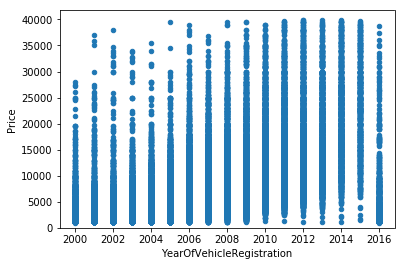

In [16]:
# Relationship with nemeric variables
var = 'YearOfVehicleRegistration'
data = pd.concat([train['Price'], train[var]],axis=1)
data.plot.scatter(x=var, y='Price',ylim=(0.800000))
#Noticed that there are good amount of cars registered in 2016


In [17]:
print("Size before removing cars whose registration > 2016", len(train))
train = train[train["YearOfVehicleRegistration"] <= 2016]
print("Rows after removing cars whose registration was AFTER 2016 => ", len(train))

Size before removing cars whose registration > 2016 58857
Rows after removing cars whose registration was AFTER 2016 =>  58857


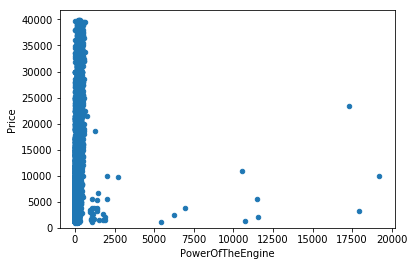

In [18]:
# Relationship with nemeric variables
var = 'PowerOfTheEngine'
data = pd.concat([train['Price'], train[var]],axis=1)
data.plot.scatter(x=var, y='Price',ylim=(0.800000))
# Noticed that there are outliers present


In [19]:
# AS we noticed there are lot of data points around Power Of the Engine
#  It is obvious, we cannot have cars with one power, so lets get rid of them
print("Size before removing cars with 1 power", len(train))
train = train[train["PowerOfTheEngine"] >= 60]
print("Size after removing cars with less than 60hp", len(train))

Size before removing cars with 1 power 58857
Size after removing cars with less than 60hp 53621


In [20]:
# AS Maximum HP of any carengine is 810 until now as per google. Let remove the the Data pionts wiht has more than 1000 Hp
train = train[train["PowerOfTheEngine"] <= 1000]
print("Size after removing cars with more than 1000hp", len(train))

Size after removing cars with more than 1000hp 53588


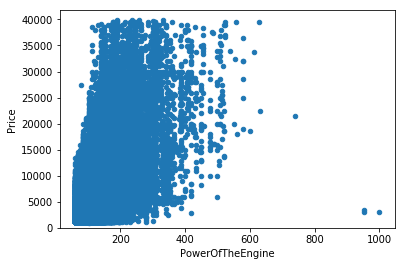

In [21]:
# Relationship with nemeric variables
var = 'PowerOfTheEngine'
data = pd.concat([train['Price'], train[var]],axis=1)
data.plot.scatter(x=var, y='Price',ylim=(0.800000))
# Noticed that there are outliers present

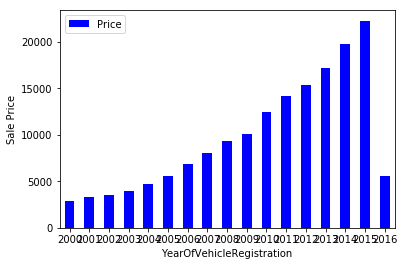

In [22]:
Year_of_registaration_pivot = train.pivot_table(index='YearOfVehicleRegistration', values='Price',aggfunc=np.mean)
Year_of_registaration_pivot.plot(kind='bar', color='blue')
plt.xlabel('YearOfVehicleRegistration')
plt.ylabel('Sale Price')
plt.xticks(rotation=0)
plt.show()
# Noticed that te Sale Price is increased as Year of the registraton increases except for te year 2016



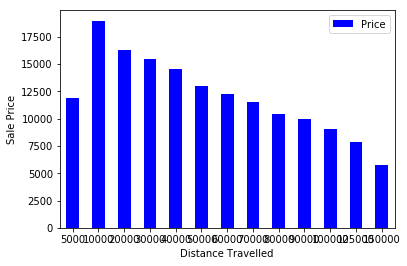

In [23]:
Distance_travel_pivot = train.pivot_table(index='DistranceTravelled', values='Price',aggfunc=np.mean)
Distance_travel_pivot.plot(kind='bar', color='blue')
plt.xlabel('Distance Travelled')
plt.ylabel('Sale Price')
plt.xticks(rotation=0)
plt.show()
# Noticed the Avg Car price is reduced as Distance travelled increases

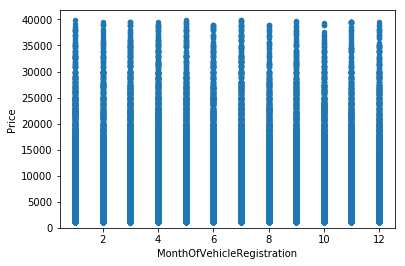

In [24]:
# Relationship with nemeric variables
var = 'MonthOfVehicleRegistration'
data = pd.concat([train['Price'], train[var]],axis=1)
data.plot.scatter(x=var, y='Price',ylim=(0.800000))
# Noticed that there are outliers present


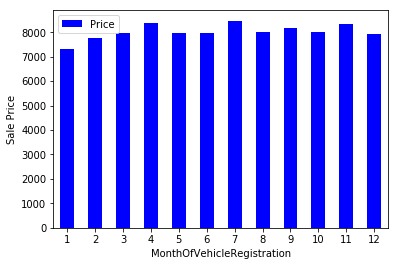

In [25]:
Month_of_registaration_pivot = train.pivot_table(index='MonthOfVehicleRegistration', values='Price',aggfunc=np.mean)
Month_of_registaration_pivot.plot(kind='bar', color='blue')
plt.xlabel('MonthOfVehicleRegistration')
plt.ylabel('Sale Price')
plt.xticks(rotation=0)
plt.show()
# Noticed that te Sale Price is increased as Year of the registraton increases except for te year 2016

In [26]:
Numerical.head(6)

,VehicleID,Price,YearOfVehicleRegistration,PowerOfTheEngine,DistranceTravelled,MonthOfVehicleRegistration,NumberOfPictures,ZipCode
0,1,3850,2004,94,50000,7,0,34474
1,2,5999,2007,140,150000,5,0,50765
2,3,5990,2007,150,150000,2,0,90475
3,4,4000,2005,150,150000,9,0,40699
4,5,12950,2005,200,125000,3,0,84347
5,6,3600,2000,129,150000,5,0,45884


In [27]:
train1 = train.copy()
train1.head(2)

,VehicleID,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,Price,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,NumberOfPictures,ZipCode,DateOfAdLastSeen
0,1,03-04-2016 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,Other,50000,7,petrol,subaru,No,03-04-2016 00:00,0,34474,07-04-2016 13:15
1,2,08-03-2016 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,passat,150000,5,diesel,volkswagen,No,08-03-2016 00:00,0,50765,11-03-2016 17:15


In [28]:
import datetime
from datetime import date
train['VehiceRegistrationDate'] = pd.to_datetime(train.YearOfVehicleRegistration.astype(str) + '-' + train.MonthOfVehicleRegistration.astype(str))
test['VehiceRegistrationDate'] = pd.to_datetime(test.YearOfVehicleRegistration.astype(str) + '-' + test.MonthOfVehicleRegistration.astype(str))
today = pd.to_datetime(date.today())
train["AgeofVehicleinDays"] = (today - train['VehiceRegistrationDate']).dt.days
test["AgeofVehicleinDays"] = (today - test['VehiceRegistrationDate']).dt.days
train.drop(['MonthOfVehicleRegistration', 'YearOfVehicleRegistration','VehiceRegistrationDate'],axis=1, inplace=True)

# OR
# df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))

In [29]:
train.head(2)

,VehicleID,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,Price,VehicleType,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,NumberOfPictures,ZipCode,DateOfAdLastSeen,AgeofVehicleinDays
0,1,03-04-2016 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,manual,94,Other,50000,petrol,subaru,No,03-04-2016 00:00,0,34474,07-04-2016 13:15,5331
1,2,08-03-2016 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,manual,140,passat,150000,diesel,volkswagen,No,08-03-2016 00:00,0,50765,11-03-2016 17:15,4297


In [30]:
# Extract Numerical Variables
Numerical = train.select_dtypes(include=[np.number])
Numerical.describe()

,VehicleID,Price,PowerOfTheEngine,DistranceTravelled,NumberOfPictures,ZipCode,AgeofVehicleinDays
count,53588.000000,53588.000000,53588.000000,53588.000000,53588.0,53588.000000,53588.000000
mean,29408.063540,8015.459692,138.075353,119504.646563,0.0,52388.843902,4465.913973
std,16990.737056,6806.297491,59.253514,41501.228722,0.0,25708.628011,1458.946928
min,1.000000,1001.000000,60.000000,5000.000000,0.0,1067.000000,795.000000
25%,14688.750000,3046.750000,101.000000,90000.000000,0.0,32107.750000,3413.000000
50%,29398.500000,5847.000000,130.000000,150000.000000,0.0,51580.000000,4570.000000
75%,44113.250000,10600.000000,165.000000,150000.000000,0.0,73240.000000,5635.000000
max,58857.000000,39800.000000,1000.000000,150000.000000,0.0,99998.000000,6974.000000


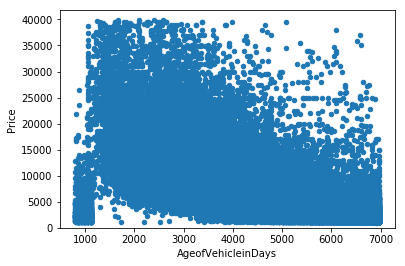

In [31]:
# Relationship with nemeric variables
var = 'AgeofVehicleinDays'
data = pd.concat([train['Price'], train[var]],axis=1)
data.plot.scatter(x=var, y='Price',ylim=(0.800000))
# Noticed that there are outliers present

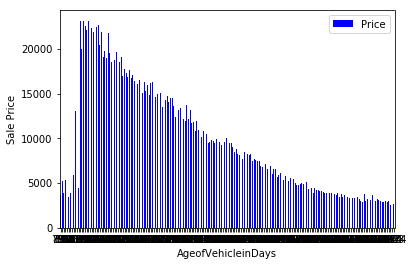

In [32]:
AgeofVehichle_pivot = train.pivot_table(index='AgeofVehicleinDays', values='Price',aggfunc=np.mean)
AgeofVehichle_pivot.plot(kind='bar', color='blue')
plt.xlabel('AgeofVehicleinDays')
plt.ylabel('Sale Price')
plt.xticks(rotation=0)
plt.show()
# Noticed that te Sale Price is increased as Year of the registraton increases except for te year 2016
# It is clearly evident the Price of The Car is decrasing as it is getting old

In [33]:
# Extract Numeric features
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

VehicleID             int64
Price                 int64
PowerOfTheEngine      int64
DistranceTravelled    int64
NumberOfPictures      int64
ZipCode               int64
AgeofVehicleinDays    int64
dtype: object

In [34]:
# Calcution correlation between all numeric features
corr = numeric_features.corr()
print(corr['Price'].sort_values(ascending=False)[:5])
print(corr['Price'].sort_values(ascending=False)[-5:])

Price                 1.000000
PowerOfTheEngine      0.546892
ZipCode               0.081367
VehicleID             0.004951
DistranceTravelled   -0.452339
Name: Price, dtype: float64
ZipCode               0.081367
VehicleID             0.004951
DistranceTravelled   -0.452339
AgeofVehicleinDays   -0.612223
NumberOfPictures           NaN
Name: Price, dtype: float64


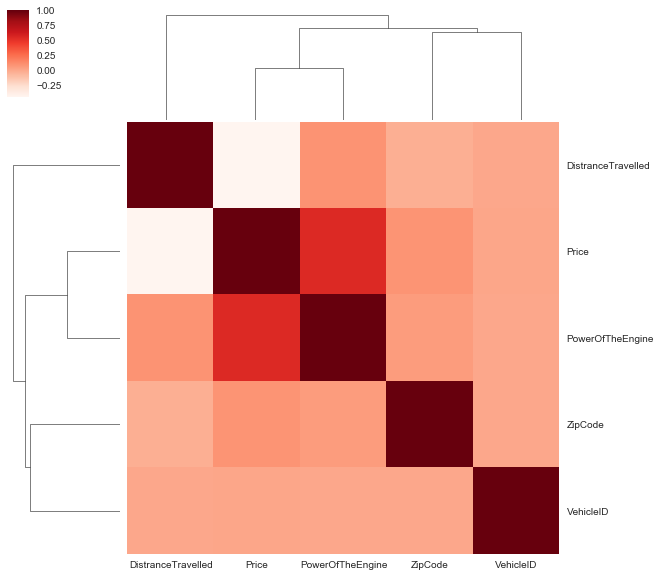

In [35]:
# SalePrice Correlation Matrix
k = 5
cols = corr.nlargest(k , 'Price')['Price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.00)
hm = sns.clustermap(cm , cmap = "Reds",cbar = True,square = True,
                 yticklabels = cols.values, xticklabels = cols.values)

In [36]:
# Handling Null Values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
IsDamageRepaired,5100
TypeOfTheFuelUsed,1481
VehicleType,1193
GearBoxType,593
AgeofVehicleinDays,0
DataCollectedDate,0
NameOfTheVehicle,0
SellerType,0
OfferType,0


In [37]:
print ("Unique values are:", train.VehicleType.unique())

Unique values are: ['Small Car' 'Combi' 'limousine' 'bus' 'coupe' 'suv' nan 'cabrio' 'Other']


In [38]:
# Extract Categorical Variables
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,VehicleType,GearBoxType,ModelOfTheVehicle,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,DateOfAdLastSeen
count,53588,53588,53588,53588,52395,52995,53588,52107,53588,48488,53588,53588
unique,12187,37132,1,1,8,2,234,7,38,2,75,10137
top,30-03-2016 21:55,BMW_116i,private,offer,limousine,manual,golf,petrol,volkswagen,No,03-04-2016 00:00,06-04-2016 06:45
freq,17,105,53588,53588,14871,39207,3910,28134,10543,45503,2267,132


In [39]:
# Imputing the Missing values with Most frquenet Items for categorical variable
col_names = pd.DataFrame(categoricals.columns)
col_names
for cols in categoricals.columns:
    print(cols)
    train[cols] = train[cols].fillna(train[cols].mode().iloc[0])

DataCollectedDate
NameOfTheVehicle
SellerType
OfferType
VehicleType
GearBoxType
ModelOfTheVehicle
TypeOfTheFuelUsed
BrandOfTheVehicle
IsDamageRepaired
DateOfAdCreation
DateOfAdLastSeen


In [40]:
train.isnull().sum()

VehicleID             0
DataCollectedDate     0
NameOfTheVehicle      0
SellerType            0
OfferType             0
Price                 0
VehicleType           0
GearBoxType           0
PowerOfTheEngine      0
ModelOfTheVehicle     0
DistranceTravelled    0
TypeOfTheFuelUsed     0
BrandOfTheVehicle     0
IsDamageRepaired      0
DateOfAdCreation      0
NumberOfPictures      0
ZipCode               0
DateOfAdLastSeen      0
AgeofVehicleinDays    0
dtype: int64

In [41]:
print ("Original: \n") 
print (train.GearBoxType.value_counts(), "\n")

Original: 

manual       39800
automatic    13788
Name: GearBoxType, dtype: int64 



In [42]:
print (train.VehicleType.value_counts(), "\n")

limousine    16064
Combi        12235
Small Car     9613
bus           6022
cabrio        3735
suv           2981
coupe         2628
Other          310
Name: VehicleType, dtype: int64 



Index(['Price'], dtype='object')


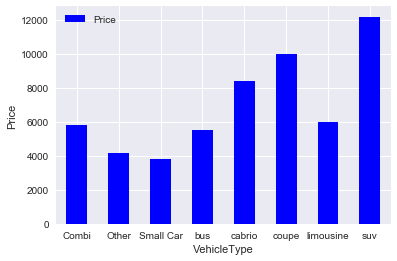

In [43]:
VehicleType_pivot = train.pivot_table(index='VehicleType', values='Price',aggfunc=np.median)
print(VehicleType_pivot.columns)
VehicleType_pivot.plot(kind='bar', color='blue')
plt.xlabel('VehicleType')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()
# Noticed the Avg Car price is reduced as Distance travelled increases

In [44]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,DataCollectedDate,NameOfTheVehicle,SellerType,OfferType,VehicleType,GearBoxType,ModelOfTheVehicle,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,DateOfAdLastSeen
count,53588,53588,53588,53588,53588,53588,53588,53588,53588,53588,53588,53588
unique,12187,37132,1,1,8,2,234,7,38,2,75,10137
top,30-03-2016 21:55,BMW_116i,private,offer,limousine,manual,golf,petrol,volkswagen,No,03-04-2016 00:00,06-04-2016 06:45
freq,17,105,53588,53588,16064,39800,3910,29615,10543,50603,2267,132


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53588 entries, 0 to 58856
Data columns (total 19 columns):
VehicleID             53588 non-null int64
DataCollectedDate     53588 non-null object
NameOfTheVehicle      53588 non-null object
SellerType            53588 non-null object
OfferType             53588 non-null object
Price                 53588 non-null int64
VehicleType           53588 non-null object
GearBoxType           53588 non-null object
PowerOfTheEngine      53588 non-null int64
ModelOfTheVehicle     53588 non-null object
DistranceTravelled    53588 non-null int64
TypeOfTheFuelUsed     53588 non-null object
BrandOfTheVehicle     53588 non-null object
IsDamageRepaired      53588 non-null object
DateOfAdCreation      53588 non-null object
NumberOfPictures      53588 non-null int64
ZipCode               53588 non-null int64
DateOfAdLastSeen      53588 non-null object
AgeofVehicleinDays    53588 non-null int64
dtypes: int64(7), object(12)
memory usage: 8.2+ MB


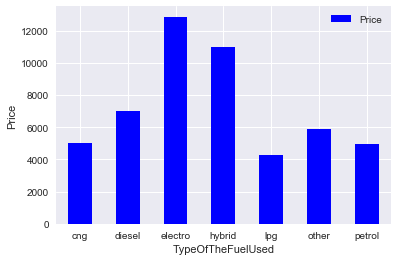

In [46]:
 
TypeOfTheFuelUsed_pivot = train.pivot_table(index='TypeOfTheFuelUsed', values='Price',aggfunc=np.median)
TypeOfTheFuelUsed_pivot.plot(kind='bar', color='blue')
plt.xlabel('TypeOfTheFuelUsed')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

In [47]:
for col in train.columns:
   if (train[col].dtype == "object"):
       train[col] = train[col].astype('category')

for col in train.columns:
   if (train[col].dtype == np.float64):
       train[col] = train[col].fillna(0).astype(np.int64)
    
for col in test.columns:
   if (test[col].dtype == "object"):
       test[col] = test[col].astype('category')
        
for col in test.columns:
   if (test[col].dtype == np.float64):
       test[col] = test[col].fillna(0).astype(np.int64)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53588 entries, 0 to 58856
Data columns (total 19 columns):
VehicleID             53588 non-null int64
DataCollectedDate     53588 non-null category
NameOfTheVehicle      53588 non-null category
SellerType            53588 non-null category
OfferType             53588 non-null category
Price                 53588 non-null int64
VehicleType           53588 non-null category
GearBoxType           53588 non-null category
PowerOfTheEngine      53588 non-null int64
ModelOfTheVehicle     53588 non-null category
DistranceTravelled    53588 non-null int64
TypeOfTheFuelUsed     53588 non-null category
BrandOfTheVehicle     53588 non-null category
IsDamageRepaired      53588 non-null category
DateOfAdCreation      53588 non-null category
NumberOfPictures      53588 non-null int64
ZipCode               53588 non-null int64
DateOfAdLastSeen      53588 non-null category
AgeofVehicleinDays    53588 non-null int64
dtypes: category(12), int64(7)
memory 

In [49]:
train1 = train.copy()
test1 = test.copy()
train1.columns

Index(['VehicleID', 'DataCollectedDate', 'NameOfTheVehicle', 'SellerType',
       'OfferType', 'Price', 'VehicleType', 'GearBoxType', 'PowerOfTheEngine',
       'ModelOfTheVehicle', 'DistranceTravelled', 'TypeOfTheFuelUsed',
       'BrandOfTheVehicle', 'IsDamageRepaired', 'DateOfAdCreation',
       'NumberOfPictures', 'ZipCode', 'DateOfAdLastSeen',
       'AgeofVehicleinDays'],
      dtype='object')

In [50]:
train1.drop(['VehicleID','DataCollectedDate','NameOfTheVehicle','SellerType','OfferType','NumberOfPictures','DateOfAdCreation','ZipCode','DateOfAdLastSeen'], axis=1,inplace=True)

In [51]:
train_labels = train1.pop('Price')

In [52]:
categorical_Attributes = train1.select_dtypes(include=['category']).columns

In [53]:
numerical_Attributes = train1.select_dtypes(exclude=['category']).columns

In [54]:
train1= pd.get_dummies(columns=categorical_Attributes,data=train1,prefix=categorical_Attributes,prefix_sep="_",drop_first=True)

In [55]:
test1= pd.get_dummies(columns=categorical_Attributes,data=test1,prefix=categorical_Attributes,prefix_sep="_",drop_first=True)

In [56]:
numerical_Attributes_train = train1.select_dtypes(exclude=['category']).columns

In [57]:
cols_test_not_train =   set(test1.columns).difference(set(train1.columns))
cols_train_not_test =  set(train1.columns).difference(set(test1.columns))
for cols in cols_test_not_train:
    test1.drop([cols],axis=1, inplace=True)
for cols in cols_train_not_test:
    test1[cols] =  0

In [58]:
print(train1.shape, test1.shape)


(53588, 288) (19594, 288)


In [59]:
# Interpolate Missing Valus with Average
data = train1.select_dtypes(include=[np.number]).interpolate().dropna()

In [60]:
data.head(2)
print(train1.shape, data.shape)

(53588, 288) (53588, 288)


In [61]:
sum(data.isnull().sum() != 0)

0

In [62]:
# Build a Linear Model uisng Log Transformation
y= np.log(train_labels)
X = data

In [63]:
# Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=1, test_size=0.2)

In [64]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42870, 288)
(10718, 288)
(42870,)
(10718,)


In [65]:
 ## Scale the numeric attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for cols in numerical_Attributes :
    X_train[cols] = scaler.fit_transform(X_train[[cols]])
    
for cols in numerical_Attributes :
    X_test[cols] = scaler.fit_transform(X_test[[cols]])

In [66]:
# Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [67]:
 # Fit the Model 
model_lr = lr.fit(X_train, y_train)

In [68]:
# Evaluate the performance and visualize results
print ("R^2 is: \n", model_lr.score(X_test, y_test))

R^2 is: 
 0.8234922477276175


In [69]:
# Predictions
y_pred_lr = model_lr.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_pred_lr))

RMSE is: 
 0.11798295491732805


In [71]:
# Evaluating the algorithm
from sklearn import metrics
print("Mean absolute Error:", metrics.mean_absolute_error(y_pred_lr,y_test))
print("Mean Squared Error:", metrics.mean_squared_error(y_pred_lr,y_test))
print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_lr,y_test)))

Mean absolute Error: 0.24533995178339946
Mean Squared Error: 0.11798295491732805
Root Mean Square error: 0.3434864697733057


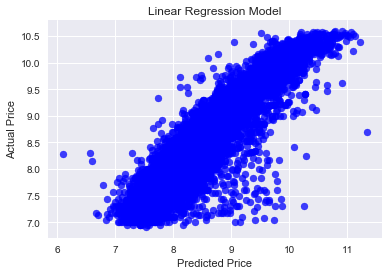

In [72]:
# Visualization
actual_values = y_test
plt.scatter(y_pred_lr, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

R^2 is: 
 0.8235260324651924
Root Mean Square error: 0.3434535954223363


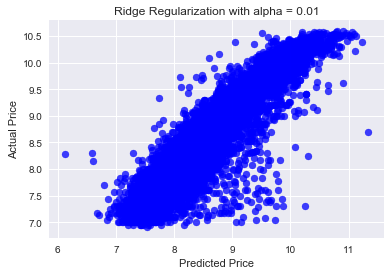

R^2 is: 
 0.8237800671222049
Root Mean Square error: 0.3432063053008115


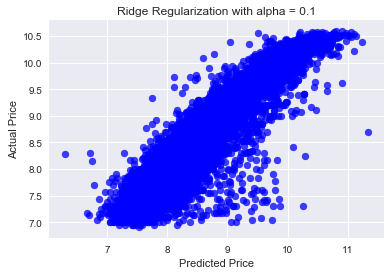

R^2 is: 
 0.8246518245949706
Root Mean Square error: 0.34235633447175434


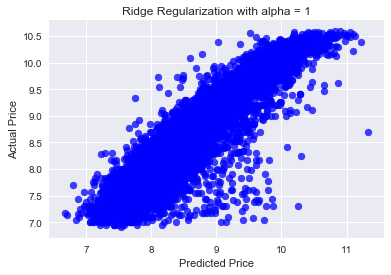

R^2 is: 
 0.8242557027390831
Root Mean Square error: 0.34274281788451794


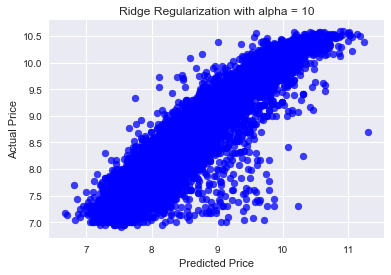

R^2 is: 
 0.8190397475840461
Root Mean Square error: 0.3477918005250329


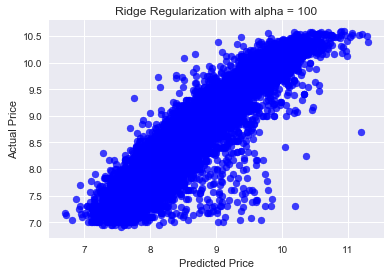

In [73]:
# Model2 using Ridge Regularization
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    print ("R^2 is: \n", ridge_model.score(X_test, y_test))
    print("Root Mean Square error:", np.sqrt(metrics.mean_squared_error(y_pred_ridge,y_test)))

    plt.scatter(y_pred_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                     np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [74]:
# Build Model Using Gradient Bossting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Model in use
GBM = GradientBoostingRegressor() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200,250],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1
                              ,0.5,0.9]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid)

In [ ]:
%time CV_GBM.fit(X=X_train, y=y_train)